# Fitting a Straight Line with `SciKit-Learn`

Straight line fitting is a [linear regression](http://scikit-learn.org/stable/modules/linear_model.html) problem - and an example of predictive learning. 

A predictive model will have been "fitted" to the data when an assumed loss function has been minimized. A popular choice of minimized loss function is the following, corresponding to the method of "ordinary least squares":

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

Let's fit some test data with a straight line using the `SciKit-Learn` library, and see how accurately we can make our predictions.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model

In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# Load the boston dataset, and focus on just one attribute: LSTAT (attribute 13)
boston = datasets.load_boston()

X = np.atleast_2d(boston.data[:,12]).T
y = np.atleast_2d(boston.target).T

# Make a training/test split:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

labels = ['LSTAT','MEDV']

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(379, 1) (127, 1)
(379, 1) (127, 1)


/Users/pjm/lsst/DarwinX86/anaconda/2.1.0-4-g35ca374/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


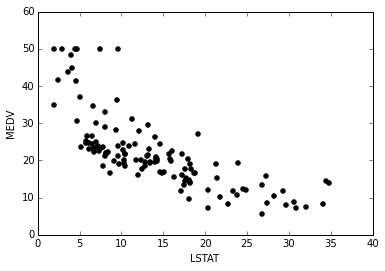

In [3]:
plt.scatter(X_test, y_test,  color='black')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [4]:
# Create linear regression object:
model = linear_model.LinearRegression()

# Train the model using the training sets:
model.fit(X_train, y_train)

# The coefficients:
print("Coefficients:", model.coef_)

('Coefficients:', array([[-0.95523143]]))


In [5]:
# The mean square prediction error:
print("Training data: MSE = %.2f"
      % np.mean((model.predict(X_train) - y_train) ** 2))
print("Test data: MSE = %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
print ""
# Explained variance score: 1 is perfect prediction:
print('Training data: Variance score = %.2f' % model.score(X_train, y_train))
print('Test data: Variance score = %.2f' % model.score(X_test, y_test))

Training data: MSE = 35.90
Test data: MSE = 46.43

Training data: Variance score = 0.55
Test data: Variance score = 0.54


* The "score" $R^2$ is defined as $(1 - u/v)$, where $u$ is the *regression sum of squares* $\sum (y_{\rm true} - y_{\rm pred})^2$ and $v$ is the residual sum of squares $\sum (y_{\rm true} - \overline{y_{\rm true}})^2)$. The best possible score is 1.0, lower values are worse.


* We expect the training score to be higher than the test score. 

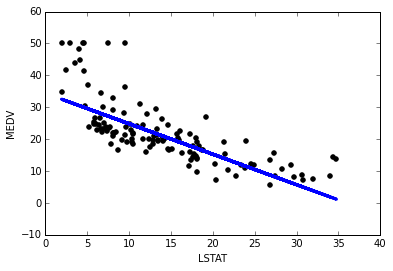

In [6]:
# Plot outputs:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#### Question:

How is this procedure different from previous occasions we have fitted a straight line?

## Optimizing Model Prediction Accuracy

* In machine learning our goal is to make the most accurate predictions we can. Above, we made one training/test split, and computed the prediction error. The model that minimizes the *generalized prediction error* can be found (approximately) with *cross validation*.


* In cross validation we consider all available training test splits, and look at the mean score across all of these *folds*. 

<img src="figures/cross_validation.svg" width=100%>

In [7]:
from sklearn.cross_validation import cross_val_score

model = linear_model.LinearRegression()

cross_val_score(model, X, y, cv=5, scoring='r2')

array([ 0.31784807,  0.5406078 ,  0.07608699,  0.42423767,  0.1267687 ])

* How we design the folds matters: we want each subset of the data to be a fair sample of the whole.

* In this problem, we want to select the LSTAT values randomly (rather than sequentially).

In [8]:
from sklearn.cross_validation import ShuffleSplit

shuffle_split = ShuffleSplit(len(X), 20, test_size=0.4)
cross_val_score(model, X, y, cv=shuffle_split)

array([ 0.4795466 ,  0.49150754,  0.52113272,  0.52706646,  0.55880281,
        0.52911045,  0.5303165 ,  0.51396338,  0.4964185 ,  0.54876149,
        0.54475834,  0.53783231,  0.56105512,  0.52640527,  0.55365171,
        0.57414642,  0.51580527,  0.5490629 ,  0.5242485 ,  0.50054754])

In [9]:
MSE = cross_val_score(model, X, y, cv=shuffle_split, scoring='mean_squared_error')
GE,errGE = np.mean(MSE),np.std(MSE)
print "Generalization error:",GE,"+/-",errGE

Generalization error: -39.3373243833 +/- 3.85722277992


In [10]:
R2 = cross_val_score(model, X, y, cv=shuffle_split, scoring='r2')
meanR2,errR2 = np.mean(R2),np.std(R2)
print "Mean score:",meanR2,"+/-",errR2

Mean score: 0.536242204556 +/- 0.0290604605954


## Model Expansion

* Let's expand our linear model to include some higher order terms (quadratic, cubic etc). This can be done by adding additional feature columns to the design matrix $X$. We are still just predicting $y$, but now we'll be asking for more coefficients.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
XX = poly.fit_transform(X)
XX

array([[  1.00000000e+00,   4.98000000e+00,   2.48004000e+01,
          1.23505992e+02,   6.15059840e+02],
       [  1.00000000e+00,   9.14000000e+00,   8.35396000e+01,
          7.63551944e+02,   6.97886477e+03],
       [  1.00000000e+00,   4.03000000e+00,   1.62409000e+01,
          6.54508270e+01,   2.63766833e+02],
       ..., 
       [  1.00000000e+00,   5.64000000e+00,   3.18096000e+01,
          1.79406144e+02,   1.01185065e+03],
       [  1.00000000e+00,   6.48000000e+00,   4.19904000e+01,
          2.72097792e+02,   1.76319369e+03],
       [  1.00000000e+00,   7.88000000e+00,   6.20944000e+01,
          4.89303872e+02,   3.85571451e+03]])

In [12]:
polymodel = linear_model.LinearRegression()

poly_split = ShuffleSplit(len(XX), 20, test_size=0.4)

R2 = cross_val_score(polymodel, XX, y, cv=poly_split, scoring='r2')

meanR2,errR2 = np.mean(R2),np.std(R2)
print "Mean score:",meanR2,"+/-",errR2

Mean score: 0.660343786026 +/- 0.028411968887


In [13]:
# Make predictions with models:
from sklearn.cross_validation import cross_val_predict

y_straightline = cross_val_predict(model, X, y, cv=10)
y_polynomial = cross_val_predict(polymodel, XX, y, cv=10)

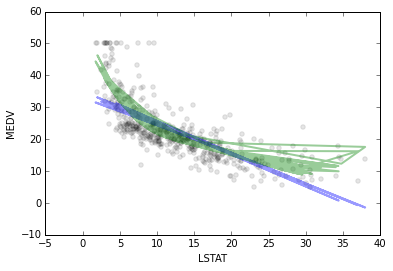

In [14]:
# Plot outputs:
plt.scatter(X, y,  color='black', alpha=0.1)
plt.plot(X, y_straightline, color='blue', linewidth=2, alpha=0.4)
plt.plot(X, y_polynomial, color='green', linewidth=2, alpha=0.4)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

* In this example, the polynomial degree is a control parameter that needs to be set: we can search this parameter space for the value that gives the highest average cross validation score (or lowest generalization error). 

## Multiple Linear Regression

* The Boston dataset has 13 attributes, more than one of which might contain information about house prices in the city. Let's train a linear model on all these attributes, and see if we can improve our score.

In [15]:
# Define a linear model:
supermodel = linear_model.LinearRegression()

# Use all the data, and set up a 20-fold cross validation run:
super_split = ShuffleSplit(len(boston.data), 20, test_size=0.4)

# Carry out the cross-validation of the model, training, testing and reporting:
R2 = cross_val_score(supermodel, boston.data, boston.target, cv=super_split, scoring='r2')

# Compute our model prediction accuracy score, for comparison with other models:
meanR2,errR2 = np.mean(R2),np.std(R2)
print "Mean score:",meanR2,"+/-",errR2

Mean score: 0.720145144735 +/- 0.0330249652857


* We just went from a simple hypothesis (house price depends on LSTAT) to a very much more complex one (house price could depend on all of our 13 measured attributes) in one step. The data analysis is *automated*, in the sense that we simply fed our machine new inputs and it processed them.


* Using all our data, we are now better at predicting house prices - *but we have gained no new understanding of how the Boston housing market works.*


* Machine learning algorithms are designed to make good use of big, complex datasets, where there are likely to be many more correlations and connections than we have thought of yet. In this *data-driven* approach we assume that we will be able to make better predictions by using flexible, "non-parametric" methods that scale with the size of the dataset and allow new relationships to emerge empirically.

#### [Let's see a couple of machine learning applications in astronomy.](../examples/SDSSCatalog/Quasars.ipynb) 